# Data Pre- Processing for NLP

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Importing the saved data from EDA

data = pd.read_csv('EDA_reviews_amazon.csv')

In [3]:
data.head()

,Rating,Rating_Sentiment,Review_Title,Review,Review_str_len,Title_str_len,title_word_tokenize,Review_word_tokenize,title_wtoken_cnt,Review_wtoken_cnt,...,works,worth,written,year,years,likert_scale,lexical_diversity,PCA1,PCA2,PCA3
0,3,Neutral,more like funchuck,gave this to my dad for a gag gift after direc...,93,18,"['more', 'like', 'funchuck']","['gave', 'this', 'to', 'my', 'dad', 'for', 'a'...",3,20,...,0.0,0.000000,0.0,0.0,0.000000,Average,0.160000,-0.100980,-0.045847,0.022069
1,5,Positive,inspiring,i hope a lot of people hear this cd we need m...,204,9,['inspiring'],"['i', 'hope', 'a', 'lot', 'of', 'people', 'hea...",1,38,...,0.0,0.000000,0.0,0.0,0.000000,Good,0.086538,-0.085753,0.003868,-0.122467
2,5,Positive,the best soundtrack ever to anything,i m reading a lot of reviews saying that this ...,470,37,"['the', 'best', 'soundtrack', 'ever', 'to', 'a...","['i', 'm', 'reading', 'a', 'lot', 'of', 'revie...",6,96,...,0.0,0.259375,0.0,0.0,0.248071,Good,0.035904,-0.113531,-0.050741,-0.071864
3,5,Positive,too good to be true,probably the greatest soundtrack in history u...,377,19,"['too', 'good', 'to', 'be', 'true']","['probably', 'the', 'greatest', 'soundtrack', ...",5,67,...,0.0,0.383432,0.0,0.0,0.000000,Good,0.051327,-0.127917,-0.052078,0.012366
4,5,Positive,there s a reason for the price,there s a reason this cd is so expensive even...,193,30,"['there', 's', 'a', 'reason', 'for', 'the', 'p...","['there', 's', 'a', 'reason', 'this', 'cd', 'i...",7,41,...,0.0,0.000000,0.0,0.0,0.000000,Good,0.083067,-0.123744,0.000005,-0.144462


In [4]:
# Step1 defining features and target

# Define the target variable (y) and features (X)
# The `Rating_Sentiment` column appears to be the target variable based on the data structure.
# Features will be all numerical columns from 'Review_str_len' to the end.
#X = data.loc[:, 'Review_str_len':'years']
# Drop non-numeric columns except target/label
X = data.drop(['Review_Title', 'title_word_tokenize','Review_word_tokenize','Review', 'likert_scale', 'Cleaned_Review', 'review_punc_stop_words_removed', 'porterStemmer', 'WordNet_Lemmatizer', 'Rating_Sentiment','PCA1','PCA2','PCA3'], axis=1)
y = data['Rating_Sentiment']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (1800000, 107)
Target shape: (1800000,)


In [5]:
X.head()

,Rating,Review_str_len,Title_str_len,title_wtoken_cnt,Review_wtoken_cnt,review_removed_cnt,actually,album,author,bad,...,want,watch,way,work,works,worth,written,year,years,lexical_diversity
0,3,93,18,3,20,9,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.160000
1,5,204,9,1,38,22,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086538
2,5,470,37,6,96,34,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.259375,0.0,0.0,0.248071,0.035904
3,5,377,19,5,67,28,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.383432,0.0,0.0,0.000000,0.051327
4,5,193,30,7,41,11,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.083067


In [6]:
# Step 2: Split the data into training and validation sets

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training features shape: {X_train.shape}")
print(f"Validation features shape: {X_val.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Validation target shape: {y_val.shape}")

Training features shape: (1440000, 107)
Validation features shape: (360000, 107)
Training target shape: (1440000,)
Validation target shape: (360000,)


# Modelling

## Traditional Machine Learning Model

### Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression 

#Model intialization
lr_model = LogisticRegression()

# Training the model
lr_model.fit(X_train,y_train)

# Make predictions and evaluate
y_pred = lr_model.predict(X_val)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/s

In [8]:
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_val, y_pred))

Logistic Regression Performance:
Accuracy: 0.7469
Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.83      0.87    120224
     Neutral       0.64      0.56      0.60    119710
    Positive       0.69      0.85      0.77    120066

    accuracy                           0.75    360000
   macro avg       0.75      0.75      0.74    360000
weighted avg       0.75      0.75      0.75    360000



### K-Nearest Neighbors (KNN)

In [9]:
from sklearn.neighbors import KNeighborsClassifier 

#Model intialization
knn_model = KNeighborsClassifier()

# Training the model
knn_model.fit(X_train,y_train)

# Make predictions and evaluate
y_pred = lr_model.predict(X_val)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [20]:

print("KNN Performance:")
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_val, y_pred))

KNN Performance:
Accuracy: 0.7469
Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.83      0.87    120224
     Neutral       0.64      0.56      0.60    119710
    Positive       0.69      0.85      0.77    120066

    accuracy                           0.75    360000
   macro avg       0.75      0.75      0.74    360000
weighted avg       0.75      0.75      0.75    360000



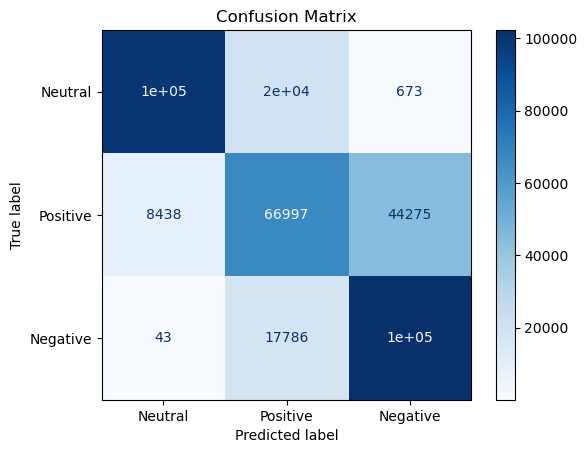

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# 1. Generate the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# 2. Get the unique labels from the test set for display
class_labels = y_val.unique()

# 3. Create a ConfusionMatrixDisplay object
# The 'display_labels' argument provides the labels for the axes.
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# 4. Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


### Support Vector Machines (SVMs)

In [ ]:
from sklearn.svm import SVC

#Model intialization
svc_model = SVC()

# Training the model
svc_model.fit(X_train,y_train)

# Make predictions and evaluate
y_pred = svc_model.predict(X_val)

In [ ]:
print("SVM Performance:")
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_val, y_pred))

### Naive Bayes

In [12]:
from sklearn.naive_bayes import MultinomialNB

#Model intialization
nb_model = MultinomialNB()

# Training the model
nb_model.fit(X_train,y_train)

# Make predictions and evaluate
y_pred = nb_model.predict(X_val)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [13]:


print("Multinomial Naive Bayes Performance:")
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_val, y_pred))

Multinomial Naive Bayes Performance:
Accuracy: 0.6429
Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.73      0.81    120224
     Neutral       0.57      0.50      0.53    119710
    Positive       0.53      0.70      0.60    120066

    accuracy                           0.64    360000
   macro avg       0.67      0.64      0.65    360000
weighted avg       0.67      0.64      0.65    360000

